In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# analysis the breif data
print("Information of data:\n", cars.info())
print("Size of data:\n", cars.shape)
print("describtion of data:\n",cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
print(cars.drivewheel.value_counts())
# Here we can see "4wd" is the error in data As 4 and r can be miss type we are converting "4wd" to "rwd"
cars.drivewheel.replace("4wd","rwd",inplace=True)
print(cars.drivewheel.value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
fwd    120
rwd     85
Name: drivewheel, dtype: int64


In [5]:
#spilting the CarName into car_company and car_model
cars["car_company"],cars["car_model"] = cars["CarName"].str.split(" ",1).str
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,rwd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [6]:
# Converting the categorical to numeric
cars["fueltype"] = cars["fueltype"].map({"gas": 0, "diesel": 1})  # GAS == 0 , DIESEL == 1
cars["aspiration"] = cars["aspiration"].map({"std":0,"turbo":1})   # STD == 0 , TURBO == 1
cars["doornumber"] =cars["doornumber"].map({"two":2,"four":4})     # TWO == 2 , FOUR == 4
cars["drivewheel"] = cars["drivewheel"].map({"rwd":0,"fwd":1})     # rwd == 0 , fwd == 1
cars["enginelocation"] = cars["enginelocation"].map({"front":1,"rear":0})  # front == 1 , rear == 0

In [7]:
# So know we have all unique values in the categorical data
# Drop the carid column
cars.drop(columns=["car_ID","CarName","car_model"],inplace=True)
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,0,0,2,convertible,0,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,2,convertible,0,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,2,hatchback,0,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,4,sedan,1,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,4,sedan,0,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
# creating dummies 
cars = pd.get_dummies(cars)

In [9]:
cars.shape

(205, 75)

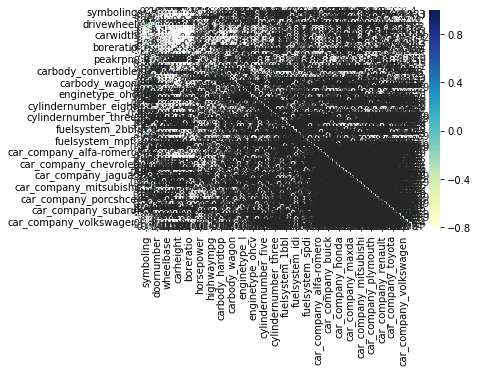

In [10]:
 # heat map for checking correlation
#plt.subplots(figsize=(30,50))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
# Apply scaler() to all the numeric columns except created 
num_vars = ["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()
df_train[num_vars].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [14]:
y_train = df_train.pop('price')
X_train = df_train
X_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'car_company_Nissan', 'car_company_alfa-romero',
       'car_company_audi', 'car_company_bmw', 'car_company_bui

In [15]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [16]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)           
rfe = rfe.fit(X_train, y_train)

In [17]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 58),
 ('fueltype', False, 23),
 ('aspiration', False, 51),
 ('doornumber', False, 55),
 ('drivewheel', False, 54),
 ('enginelocation', True, 1),
 ('wheelbase', False, 48),
 ('carlength', False, 47),
 ('carwidth', True, 1),
 ('carheight', False, 49),
 ('curbweight', False, 45),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', False, 44),
 ('compressionratio', False, 46),
 ('horsepower', True, 1),
 ('peakrpm', False, 50),
 ('citympg', False, 53),
 ('highwaympg', False, 52),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 38),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 33),
 ('carbody_wagon', False, 40),
 ('enginetype_dohc', False, 36),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 11),
 ('enginetype_ohc', False, 35),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 32),
 ('enginetype_rotor', False, 8),
 ('cylindernumber_eight', False, 37),
 ('cylindernumber_five', False, 14),
 ('cylindernumber_fou

In [18]:
#supported values
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'enginesize', 'horsepower',
       'carbody_convertible', 'enginetype_dohcv', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'car_company_bmw',
       'car_company_buick', 'car_company_isuzu', 'car_company_jaguar',
       'car_company_porsche', 'car_company_volvo'],
      dtype='object')

In [19]:
# not supported values
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'wheelbase', 'carlength', 'carheight', 'curbweight', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'car_company_Nissan', 'car_company_alfa-romero', 'car_company_audi',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_honda',
       'car_company_maxda', 'car_company_mazda', 'car_company_mercury',
       'car_company_mitsubishi', 'car_company_nissan', 'car_company_peugeot',
    

In [20]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [21]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           6.22e-70
Time:                        07:29:52   Log-Likelihood:                 218.25
No. Observations:                 143   AIC:                            -404.5
Df Residuals:                     127   BIC:                            -357.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [22]:
X_train_new = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

In [23]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           1.42e-70
Time:                        07:29:52   Log-Likelihood:                 217.10
No. Observations:                 143   AIC:                            -404.2
Df Residuals:                     128   BIC:                            -359.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [24]:
X_train_new1 = X_train_new.drop(["car_company_porsche"], axis = 1)

In [25]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           4.02e-71
Time:                        07:29:52   Log-Likelihood:                 215.67
No. Observations:                 143   AIC:                            -403.3
Df Residuals:                     129   BIC:                            -361.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [26]:
X_train_rfe2.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'horsepower',
       'carbody_convertible', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'car_company_bmw', 'car_company_buick',
       'car_company_isuzu', 'car_company_jaguar', 'car_company_volvo'],
      dtype='object')

In [27]:
X_train_vif = X_train_rfe2.drop(['const'], axis=1)

In [28]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,35.30
1,carwidth,28.28
3,horsepower,13.59
0,enginelocation,11.47
11,car_company_jaguar,2.53
9,car_company_buick,1.84
6,cylindernumber_twelve,1.58
7,cylindernumber_two,1.50
8,car_company_bmw,1.31
4,carbody_convertible,1.16


In [29]:
X_train_vif1 = X_train_vif.drop(['enginesize'], axis=1)

In [30]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.64
0,enginelocation,11.26
2,horsepower,7.14
10,car_company_jaguar,1.66
5,cylindernumber_twelve,1.56
8,car_company_buick,1.54
11,car_company_volvo,1.15
3,carbody_convertible,1.12
7,car_company_bmw,1.12
4,cylindernumber_three,1.08


In [31]:
X_train_vif2 = X_train_vif1.drop(['carwidth'], axis=1)

In [32]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,3.73
0,enginelocation,3.09
9,car_company_jaguar,1.64
4,cylindernumber_twelve,1.54
7,car_company_buick,1.13
6,car_company_bmw,1.12
2,carbody_convertible,1.08
10,car_company_volvo,1.08
5,cylindernumber_two,1.04
8,car_company_isuzu,1.04


In [33]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_vif2)
lm = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     81.91
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           3.62e-53
Time:                        07:29:53   Log-Likelihood:                 164.53
No. Observations:                 143   AIC:                            -305.1
Df Residuals:                     131   BIC:                            -269.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [34]:
X_train_vif3 = X_train_vif2.drop(['cylindernumber_three'], axis=1)

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_vif3)
lm = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     90.79
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           3.69e-54
Time:                        07:29:53   Log-Likelihood:                 164.53
No. Observations:                 143   AIC:                            -307.1
Df Residuals:                     132   BIC:                            -274.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [36]:
X_train_vif4 = X_train_vif3.drop(['car_company_isuzu'], axis=1)

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe5 = sm.add_constant(X_train_vif4)
lm = sm.OLS(y_train,X_train_rfe5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           3.58e-55
Time:                        07:29:54   Log-Likelihood:                 164.52
No. Observations:                 143   AIC:                            -309.0
Df Residuals:                     133   BIC:                            -279.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [38]:
X_train_vif5 = X_train_vif4.drop(['cylindernumber_two'], axis=1)

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe6 = sm.add_constant(X_train_vif5)
lm = sm.OLS(y_train,X_train_rfe6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           3.75e-56
Time:                        07:29:54   Log-Likelihood:                 164.36
No. Observations:                 143   AIC:                            -310.7
Df Residuals:                     134   BIC:                            -284.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [40]:
X_train_vif6 = X_train_vif5.drop(['carbody_convertible'], axis=1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe7 = sm.add_constant(X_train_vif6)
lm = sm.OLS(y_train,X_train_rfe7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           1.01e-56
Time:                        07:29:54   Log-Likelihood:                 163.11
No. Observations:                 143   AIC:                            -310.2
Df Residuals:                     135   BIC:                            -286.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [42]:
X_train_vif7 = X_train_vif6.drop(['cylindernumber_twelve'], axis=1)

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe8 = sm.add_constant(X_train_vif7)
lm = sm.OLS(y_train,X_train_rfe8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 02 Mar 2019   Prob (F-statistic):           7.95e-57
Time:                        07:29:55   Log-Likelihood:                 160.66
No. Observations:                 143   AIC:                            -307.3
Df Residuals:                     136   BIC:                            -286.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3070      0

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,3.52
0,enginelocation,2.87
4,car_company_jaguar,1.22
2,car_company_bmw,1.11
3,car_company_buick,1.09
5,car_company_volvo,1.08


In [45]:
y_train_price = lm.predict(X_train_rfe8)

Text(0.5, 0, 'Errors')

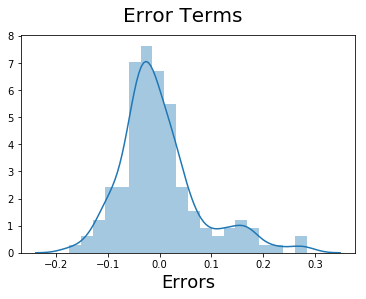

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [47]:
num_vars = ["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('price')
X_test = df_test

In [49]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [50]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

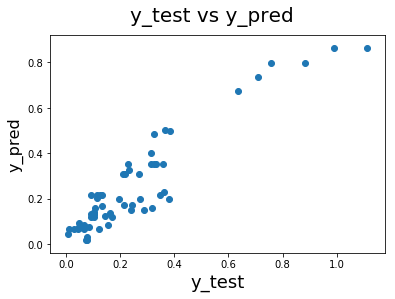

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8724943057047696